In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
import plotly.express as px 
import plotly.io as pio
import unicodedata

pio.renderers.default='browser'

# 2. Análise Exploratória e Unificação das Bases
Nesse notebook, será feita a análise exploratória das bases do trabalho, e a sua eventual unificação para utilização no modelo

### Análise Descritiva dos Dados
A base que eu agreguei é anual, isto é, ela contém os dados de ausências mensais por município. Com base em cada ano, eu utilizei o Pandas para dar um describe nos dados e entender as suas características. Para fins demonstrativos, escolhi trabalhar apenas com os dados de 2019 (pré-pandemia), mas seria possível também fazer uma base unificada com todos os anos.

In [2]:
compressed_data_folder = r'C:\Users\Matheus\Desktop\codigo_mba\base_ausencias\bases_agregadas\bases_comprimidas'

described_list = []
df_list = []


for filename in os.listdir(compressed_data_folder):
    year = filename.split('_')[0]
    file_path = os.path.join(compressed_data_folder,filename)
    df = pd.read_csv(file_path)
    df_list.append(df)
    described = df.describe()
    described['year'] = year
    described_list.append(described)

In [3]:
# 2019
described_list[0]

,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,year
count,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,2019
mean,41.213856,75.740654,65.361046,167.663268,62.563007,0.943399,115.895817,2019
std,268.450443,726.814611,659.582059,1105.261156,402.125875,7.763470,926.987768,2019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019
25%,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2019
50%,8.000000,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,2019
75%,23.000000,27.000000,22.000000,103.750000,39.750000,0.000000,60.000000,2019
max,8677.000000,33811.000000,24379.000000,38296.000000,10828.000000,288.000000,26261.000000,2019


In [4]:
#2020
described_list[1]


,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,year
count,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,2020
mean,7.520585,16.801258,26.768021,89.407605,56.629189,0.884694,156.161537,2020
std,87.603435,287.059929,276.026399,611.484810,335.775157,7.174489,1201.227480,2020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020
50%,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,30.000000,2020
75%,3.000000,3.000000,2.000000,56.000000,31.000000,0.000000,90.000000,2020
max,5225.000000,21254.000000,8760.000000,26769.000000,8846.000000,205.000000,32217.000000,2020


In [5]:
#2021
described_list[2]


,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,year
count,7511.000000,7511.000000,7511.000000,7511.000000,7511.000000,7511.000000,7511.000000,2021
mean,21.034216,29.255891,27.958594,83.073758,50.321528,0.517907,122.428039,2021
std,151.104257,334.685767,313.788621,581.394741,281.910510,5.082113,916.625239,2021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021
50%,4.000000,2.000000,0.000000,15.000000,0.000000,0.000000,25.000000,2021
75%,12.000000,9.000000,3.000000,53.000000,31.000000,0.000000,62.000000,2021
max,6789.000000,14073.000000,9786.000000,22630.000000,7271.000000,116.000000,23526.000000,2021


In [6]:
#2022
described_list[3]


,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,year
count,7653.000000,7653.00000,7653.000000,7653.000000,7653.000000,7653.000000,7653.000000,2022
mean,40.470012,43.30132,36.104404,78.969816,46.382595,0.686136,148.942898,2022
std,259.565533,440.79360,388.564399,503.479122,259.976598,6.062815,1160.329904,2022
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2022
25%,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2022
50%,8.000000,4.00000,0.000000,15.000000,0.000000,0.000000,30.000000,2022
75%,24.000000,16.00000,7.000000,52.000000,31.000000,0.000000,89.000000,2022
max,8980.000000,20996.00000,11928.000000,15894.000000,6946.000000,122.000000,32318.000000,2022


In [7]:
#2023
described_list[4]


,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,year
count,7555.000000,7555.000000,7555.000000,7555.000000,7555.000000,7555.000000,7555.000000,2023
mean,45.940966,36.620781,34.490007,82.502052,47.551158,1.461284,185.549437,2023
std,299.128470,340.220096,399.470489,575.718987,250.269829,10.819342,1392.388400,2023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023
50%,9.000000,4.000000,0.000000,15.000000,0.000000,0.000000,30.000000,2023
75%,26.000000,13.000000,6.000000,53.000000,31.000000,0.000000,93.000000,2023
max,10295.000000,11816.000000,12969.000000,20086.000000,6422.000000,322.000000,37048.000000,2023


Notei que nem todos os municípios possuem 12 meses de dados, portanto, embora todos os municípios apareçam na base, vou excluir aqueles que tem menos de 12 meses

### Análise de Concentração de Faltas

### Agregando todos os anos sistematicamente

In [8]:
pd.concat(df_list).head()

,municipio,mes,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC
0,ADAMANTINA,2019-01-01,0,0,0,30,87,0,62
1,ADAMANTINA,2019-02-01,23,35,10,94,56,0,28
2,ADAMANTINA,2019-03-01,31,20,11,122,62,0,31
3,ADAMANTINA,2019-04-01,40,26,21,109,60,0,30
4,ADAMANTINA,2019-05-01,42,78,45,88,64,0,31


In [9]:
# Agregando os dados de todos os anos
year_agg_df_list = []

for dataframe in df_list:
    data = dataframe
    year = int(dataframe['mes'][0][0:4])
    print(year)
    cities_count = dataframe['municipio'].value_counts()
    df_cities_count = pd.DataFrame(cities_count)
    #Lista de municípios com menos de 12 meses de dados - Talvez isso seja problemático, porque causa inconsistencias entre os anos - olhar isso melhor depois
    cities_to_exclude = df_cities_count.query('count < 12').index.to_list()

    #Tirando aqueles municípios com menos de 12 meses de dados
    data_filtered = data[~data['municipio'].isin(cities_to_exclude)]

    #Agregando os dados das cidades remanescentes
    columns_to_sum = [
        'TT_DIAS_FALTA_MEDICA', 'TT_DIAS_FALTA_JUST', 'TT_DIAS_FALTA_INJUST', 
        'TT_DIAS_LIC_PREMIO', 'TT_DIAS_LIC_GESTANTE', 'TT_DIAS_LIC_ACID_TRAB', 
        'TT_DIAS_LIC_INTER_PARTIC'
    ]


    data_agg = data_filtered.groupby(['municipio'])[columns_to_sum].sum().reset_index()

    # Agregando o total de faltas por município em 2019
    data_agg['TOTAL_FALTAS'] = data_agg[columns_to_sum].sum(axis=1)
    data_agg['ano'] = year
    data_agg.head(10)

    year_agg_df_list.append(data_agg)


2019
2020
2021
2022
2023


In [10]:
### Agregando os dados por municipio e por ano
combined_agg_df = pd.concat(year_agg_df_list, ignore_index=True)
#Vendo a proporção que cada município possui 
combined_agg_df['proporcao_faltas'] = combined_agg_df['TOTAL_FALTAS'] / combined_agg_df['TOTAL_FALTAS'].sum()
#Dataframe com as faltas registradas no estado, considerando apenas 
combined_agg_df

,municipio,TT_DIAS_FALTA_MEDICA,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,TOTAL_FALTAS,ano,proporcao_faltas
0,ADAMANTINA,325,316,137,1031,669,0,212,2690,2019,0.000175
1,AGUAI,273,242,173,1474,21,0,903,3086,2019,0.000201
2,AGUAS DA PRATA,69,30,0,223,58,0,1016,1396,2019,0.000091
3,AGUAS DE LINDOIA,124,152,137,806,0,0,0,1219,2019,0.000079
4,AGUAS DE SANTA BARBARA,64,86,59,225,53,0,0,487,2019,0.000032
...,...,...,...,...,...,...,...,...,...,...,...
2780,VISTA ALEGRE DO ALTO,109,35,8,358,120,0,730,1360,2023,0.000089
2781,VITORIA BRASIL,38,38,16,105,0,0,377,574,2023,0.000037
2782,VOTORANTIM,1022,581,485,1483,927,61,5748,10307,2023,0.000671
2783,VOTUPORANGA,759,356,151,1945,953,17,2977,7158,2023,0.000466


### Gráficos Descritivos

#### Boxplot

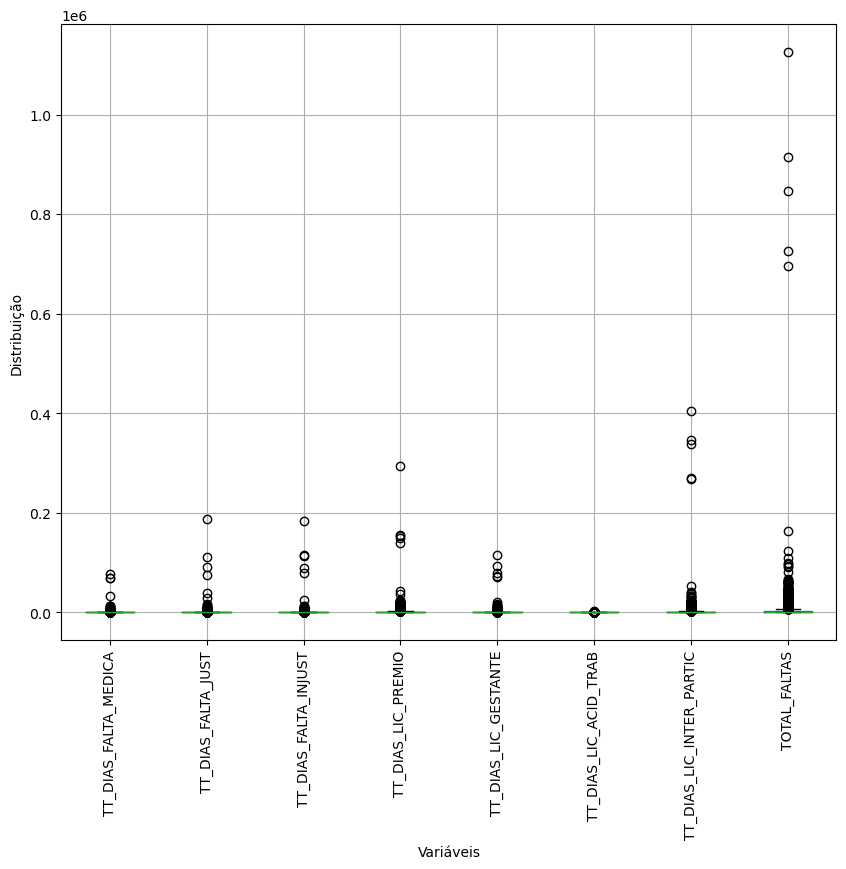

In [74]:

# Boxplot das variáveis
df = pd.DataFrame(data)

plt.figure(figsize=(10, 8)) 
combined_agg_df[['TT_DIAS_FALTA_MEDICA','TT_DIAS_FALTA_JUST','TT_DIAS_FALTA_INJUST','TT_DIAS_LIC_PREMIO','TT_DIAS_LIC_GESTANTE','TT_DIAS_LIC_ACID_TRAB','TT_DIAS_LIC_INTER_PARTIC','TOTAL_FALTAS']].boxplot()
plt.xlabel("Variáveis")
plt.ylabel("Distribuição")
plt.xticks(rotation=90)
plt.savefig('boxplot_pre_normalizacao.png', dpi=600)
plt.show()

In [12]:
#Salvando o dataframe
combined_agg_df.describe().to_excel('describe_inicial.xlsx')

#### Municípios por % de faltas

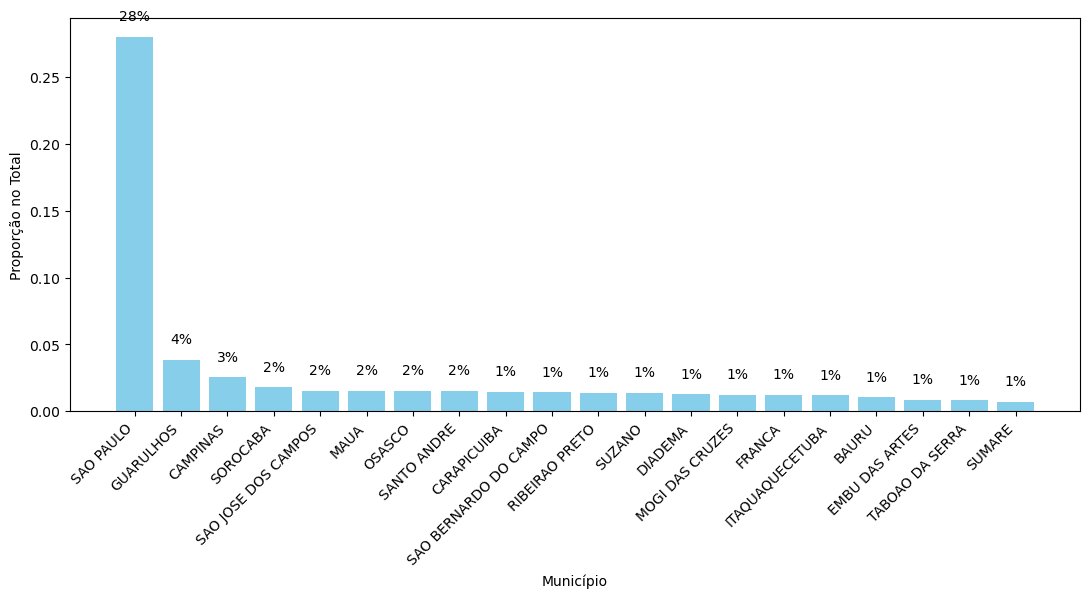

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


df = ausencias.copy()

# Pr
df['Proportion'] = df['TOTAL_FALTAS'] / df['TOTAL_FALTAS'].sum()

# Sort DataFrame by 'Proportion' in descending order and select top 20
top_20 = df.sort_values(by='Proportion', ascending=False).head(20)

# Plotting the bar plot
plt.figure(figsize=(11, 6))
bars = plt.bar(top_20['municipio'], top_20['Proportion'], color='skyblue')
plt.bar(top_20['municipio'], top_20['Proportion'], color='skyblue')
plt.xlabel('Município')
plt.ylabel('Proporção no Total')
#plt.title('20 Maiores Municípios por Proporção no Total de Ausências de Servidores (2019-2023)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.0%}', ha='center', va='bottom')


plt.savefig('distribuicao_faltas_municipio.png', dpi=600)
plt.show()


### Normalizando os Dados
Como São Paulo tem uma proporção muito maior de faltas em relação aos outros municípios, torna-se necessário normalizar os dados, isso será feito através da divisão do total de faltas no município no ano de referência pela quantidade de servidores públicos ativos no mesmo município e no mesmo período

In [15]:
compressed_data_folder = r'C:\Users\Matheus\Desktop\codigo_mba\base_servidores_ativos\bases_agregadas'

described_list = []
df_list = []


for filename in os.listdir(compressed_data_folder):
    year = filename.split('_')[0]
    file_path = os.path.join(compressed_data_folder,filename)
    df = pd.read_excel(file_path)
    df_list.append(df)
    described = df.describe()
    described['year'] = year
    described_list.append(described)

In [16]:
#Corrigindo o excesso de espaços nos nomes
population_df = pd.concat(df_list)
population_df['municipio'] = population_df['municipio'].apply(lambda x: x.strip())
population_df.shape

(3220, 3)

In [17]:
#Renomeando a coluna agregada
population_df = population_df.rename(columns={'count': 'total_servidores'})


,municipio,total_servidores,ano
0,SAO PAULO,688489,2019
1,GUARULHOS,102000,2019
2,CAMPINAS,75175,2019
3,SANTO ANDRE,45219,2019
4,SOROCABA,42749,2019
...,...,...,...
639,CANDIDO RODRIGUES,185,2023
640,OSCAR BRESSANE,184,2023
641,ANALANDIA,183,2023
642,MOTUCA,173,2023


In [18]:
# Juntando os dataframes por municipio e ano
merged_df = pd.merge(combined_agg_df, population_df, on=['municipio', 'ano'])

columns_to_normalize = [
    'TT_DIAS_FALTA_MEDICA', 'TT_DIAS_FALTA_JUST',
    'TT_DIAS_FALTA_INJUST', 'TT_DIAS_LIC_PREMIO',
    'TT_DIAS_LIC_GESTANTE', 'TT_DIAS_LIC_ACID_TRAB',
    'TT_DIAS_LIC_INTER_PARTIC', 'TOTAL_FALTAS'
]

df_normalizado = merged_df[['municipio','ano','total_servidores']].copy()

#Processo para mudar o nome dos dataframs para letras minúsculas

for col in columns_to_normalize:
    new_col_name = f"{col.lower()}_normalizado"
    df_normalizado[new_col_name] = merged_df[col] / merged_df['total_servidores']





#### Boxplot da base normalizada

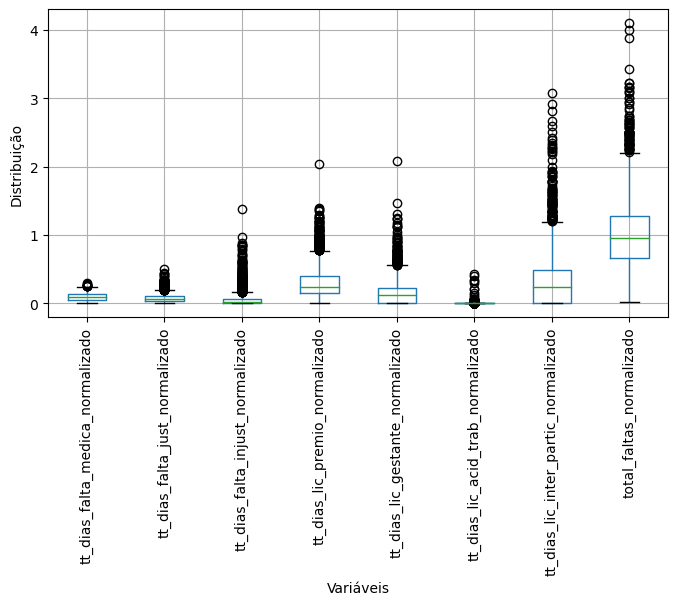

In [79]:

df = pd.DataFrame(data)

# Plotando o boxplot
plt.figure(figsize=(8, 4)) 
df_normalizado[['tt_dias_falta_medica_normalizado','tt_dias_falta_just_normalizado','tt_dias_falta_injust_normalizado','tt_dias_lic_premio_normalizado','tt_dias_lic_gestante_normalizado','tt_dias_lic_acid_trab_normalizado','tt_dias_lic_inter_partic_normalizado','total_faltas_normalizado']].boxplot()
#plt.title("Boxplot of 7 Variables")
plt.xlabel("Variáveis")
plt.ylabel("Distribuição")
plt.xticks(rotation=90)
plt.savefig('boxplot_pos_normalizacao.png', dpi=600)
plt.show()

In [21]:
#Describe da base normalizada
df_normalizado.drop(columns=['ano']).describe()

,ano,total_servidores,tt_dias_falta_medica_normalizado,tt_dias_falta_just_normalizado,tt_dias_falta_injust_normalizado,tt_dias_lic_premio_normalizado,tt_dias_lic_gestante_normalizado,tt_dias_lic_acid_trab_normalizado,tt_dias_lic_inter_partic_normalizado,total_faltas_normalizado
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,2021.000000,4994.861759,0.094068,0.076570,0.056967,0.300166,0.160833,0.001749,0.325614,1.015967
std,1.418018,30648.944334,0.052612,0.063620,0.103777,0.226578,0.180690,0.017187,0.391262,0.515529
min,2019.000000,154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014599
25%,2020.000000,495.000000,0.050052,0.034000,0.002664,0.146580,0.000000,0.000000,0.000000,0.669091
50%,2021.000000,976.000000,0.096685,0.058824,0.020346,0.242117,0.124336,0.000000,0.244098,0.962055
75%,2022.000000,3081.000000,0.129973,0.098836,0.066191,0.396947,0.225695,0.000000,0.481884,1.283893
max,2023.000000,715894.000000,0.297935,0.497041,1.386667,2.046196,2.082902,0.422764,3.084112,4.102102


In [22]:
df_normalizado.describe().to_excel('describe_normalizado.xlsx')

In [23]:
df_normalizado.to_csv('base_normalizada.csv',index=False)

### Bases de Educação
Nos próximos passos, vou unificar a base de ausências normalizadas com bases de desempenho escolar, com o objetivo de formar uma base para realizar a clusterização <br>
Para isso, vamos utilizar a base do IDEB, que possui dados de aprovação/desempenho escolar por município

In [24]:
#Esse é o caminho no meu computador - adequar para utilizar em outras máquinas
dados_educacao = r'C:\Users\Matheus\Desktop\codigo_mba\bases_municipais'
df_aprovacao = pd.read_csv(os.path.join(dados_educacao,'educacao_rendimento_mun_ultimosanos.csv'),sep=';', encoding='latin1') 



### Base Ideb

In [48]:
#Esse é o caminho no meu computador - adequar para utilizar em outras máquinas
dados_ideb = r'C:\Users\Matheus\Desktop\codigo_mba\bases_ideb'
df_inep_ai = pd.read_excel(os.path.join(dados_ideb,'IDEB_AI_MUNICIPIOS.xlsx')) 
df_inep_af = pd.read_excel(os.path.join(dados_ideb,'IDEB_AF_MUNICIPIOS.xlsx')) 
df_inep_em = pd.read_excel(os.path.join(dados_ideb,'IDEB_EM_MUNICIPIOS.xlsx'))

In [49]:
df_inep_ai.head()

,Sigla da UF,Código do Município,Nome do Município,Rede,Taxa de Aprovação - 2023,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Nota SAEB - 2023,Unnamed: 12,Unnamed: 13,IDEB\n2023\n(N x P)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matemática,Língua Portuguesa,Nota Média Padronizada (N),NaN
1,NaN,NaN,NaN,NaN,1º ao 5º ano,1º,2º,3º,4º,5º,Indicador de Rendimento (P),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP,3500105.0,Adamantina,Municipal,99.8,100,99.6,99.6,100,100,0.998396,239.75,215.83,6.463616,6.5
4,SP,3500105.0,Adamantina,Pública,99.8,100,99.6,99.6,100,100,0.998396,239.75,215.83,6.463616,6.5


In [50]:
# Vamos fazer alguns ajustes - a importação do excel possui alguns erros (espaçamento/nome das colunas)

dicionario_colunas = {
    'Sigla da UF': 'sigla_uf',
    'Código do Município': 'codigo_municipio',
    'Nome do Município':'municipio',
    'Rede':'rede',
    'Taxa de Aprovação - 2023': 'taxa_aprovacao_ai',
    'Nota SAEB - 2023': 'nota_matematica_ai',
    'Unnamed: 12': 'nota_portugues_ai',
    'Unnamed: 13': 'nota_media_padronizada_ai',
    'IDEB\n2023\n(N x P)': 'ideb_ai'
}

colunas_para_deletar = ['Unnamed: 5',
                        'Unnamed: 6',
                        'Unnamed: 7',
                        'Unnamed: 8',
                        'Unnamed: 9',
                        'Unnamed: 10']

df_inep_ai_tratado = df_inep_ai.rename(columns = dicionario_colunas)
df_inep_ai_tratado = df_inep_ai_tratado.drop(columns = colunas_para_deletar)
df_inep_ai_tratado = df_inep_ai_tratado.drop([0, 1,2], axis=0).reset_index(drop=True)

df_inep_ai_tratado.head()

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_ai,nota_matematica_ai,nota_portugues_ai,nota_media_padronizada_ai,ideb_ai
0,SP,3500105.0,Adamantina,Municipal,99.8,239.75,215.83,6.463616,6.5
1,SP,3500105.0,Adamantina,Pública,99.8,239.75,215.83,6.463616,6.5
2,SP,3500204.0,Adolfo,Municipal,100,248.39,228.17,6.852865,6.9
3,SP,3500204.0,Adolfo,Pública,100,248.39,228.17,6.852865,6.9
4,SP,3500303.0,Aguaí,Estadual,100,220.39,212.79,6.038878,6


In [51]:
# Vamos renomear as colunas com os nomes apropriados

dicionario_colunas = {
    'Sigla da UF': 'sigla_uf',
    'Código do Município': 'codigo_municipio',
    'Nome do Município':'municipio',
    'Rede':'rede',
    'Taxa de Aprovação - 2023': 'taxa_aprovacao_af',
    'Nota SAEB - 2023': 'nota_matematica_af',
    'Unnamed: 11': 'nota_portugues_af',
    'Unnamed: 12': 'nota_media_padronizada_af',
    'IDEB\n2023\n(N x P)': 'ideb_af'
}

colunas_para_deletar = ['Unnamed: 5',
                        'Unnamed: 6',
                        'Unnamed: 7',
                        'Unnamed: 8',
                        'Unnamed: 9']

df_inep_af_tratado = df_inep_af.rename(columns = dicionario_colunas)
df_inep_af_tratado = df_inep_af_tratado.drop(columns = colunas_para_deletar)
df_inep_af_tratado = df_inep_af_tratado.drop([0, 1], axis=0).reset_index(drop=True)

df_inep_af_tratado.head()

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_af,nota_matematica_af,nota_portugues_af,nota_media_padronizada_af,ideb_af
0,SP,3500105.0,Adamantina,Estadual,98.7,268.13,262.63,5.512667,5.4
1,SP,3500105.0,Adamantina,Pública,98.7,268.13,262.63,5.512667,5.4
2,SP,3500204.0,Adolfo,Municipal,99,276.86,273.79,5.844167,5.8
3,SP,3500204.0,Adolfo,Pública,99,276.86,273.79,5.844167,5.8
4,SP,3500303.0,Aguaí,Estadual,97.2,249.7,248.27,4.966167,4.8


In [52]:
# Vamos renomear as colunas com os nomes apropriados

dicionario_colunas = {
    'Sigla da UF': 'sigla_uf',
    'Código do Município': 'codigo_municipio',
    'Nome do Município':'municipio',
    'Rede':'rede',
    'Taxa de Aprovação - 2023': 'taxa_aprovacao_em',
    'Nota SAEB - 2023': 'nota_matematica_em',
    'Unnamed: 10': 'nota_portugues_em',
    'Unnamed: 11': 'nota_media_padronizada_em',
    'IDEB\n2023\n(N x P)': 'ideb_em'
}

colunas_para_deletar = ['Unnamed: 5',
                        'Unnamed: 6',
                        'Unnamed: 7',
                        'Unnamed: 8']

df_inep_em_tratado = df_inep_em.rename(columns = dicionario_colunas)
df_inep_em_tratado = df_inep_em_tratado.drop(columns = colunas_para_deletar)
df_inep_em_tratado = df_inep_em_tratado.drop([0, 1], axis=0).reset_index(drop=True)

df_inep_em_tratado.head()

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_em,nota_matematica_em,nota_portugues_em,nota_media_padronizada_em,ideb_em
0,SP,3500105.0,Adamantina,Estadual,95.2,278.15,289.92,4.936235,4.7
1,SP,3500105.0,Adamantina,Pública,95.2,278.15,289.92,4.936235,4.7
2,SP,3500204.0,Adolfo,Estadual,99,280.04,285.4,4.895115,4.8
3,SP,3500204.0,Adolfo,Pública,99,280.04,285.4,4.895115,4.8
4,SP,3500303.0,Aguaí,Estadual,89,262.67,273.83,4.477951,4


In [53]:
# Verificando o formato de dados de cada coluna
df_inep_em_tratado.dtypes

sigla_uf                      object
codigo_municipio             float64
municipio                     object
rede                          object
taxa_aprovacao_em             object
nota_matematica_em            object
nota_portugues_em             object
nota_media_padronizada_em     object
ideb_em                       object
dtype: object

In [54]:
df_inep_ai_tratado.columns

Index(['sigla_uf', 'codigo_municipio', 'municipio', 'rede',
       'taxa_aprovacao_ai', 'nota_matematica_ai', 'nota_portugues_ai',
       'nota_media_padronizada_ai', 'ideb_ai'],
      dtype='object')

In [55]:
df_inep_af_tratado.columns

Index(['sigla_uf', 'codigo_municipio', 'municipio', 'rede',
       'taxa_aprovacao_af', 'nota_matematica_af', 'nota_portugues_af',
       'nota_media_padronizada_af', 'ideb_af'],
      dtype='object')

In [56]:
df_inep_em_tratado.columns

Index(['sigla_uf', 'codigo_municipio', 'municipio', 'rede',
       'taxa_aprovacao_em', 'nota_matematica_em', 'nota_portugues_em',
       'nota_media_padronizada_em', 'ideb_em'],
      dtype='object')

In [58]:
# As colunas numéricas dos datasets estão sendo lida como strings, precisamos converter todas para um formato numérico
#Para facilitar a conversão, vamos criar uma função
def converte_para_numero(x):
    try:
    # Precisamos substituir os , por .
        if type(x) == 'str':
            x_conv = x.replace(',','.')
            x_num = pd.to_numeric(x_conv)
        else:
            x_num = pd.to_numeric(x)
    except ValueError:
        print('Erro no valor - convertendo para 0: ',x)
        x_num = 0
    
    return x_num
    

colunas_conversao_ai = ['taxa_aprovacao_ai', 'nota_matematica_ai', 'nota_portugues_ai',
                        'nota_media_padronizada_ai', 'ideb_ai']

colunas_conversao_af = [ 'taxa_aprovacao_af', 'nota_matematica_af', 'nota_portugues_af',
                         'nota_media_padronizada_af', 'ideb_af']

colunas_conversao_em = [ 'taxa_aprovacao_em', 'nota_matematica_em', 'nota_portugues_em',
                         'nota_media_padronizada_em', 'ideb_em']

# Convert the selected columns to float
for column in colunas_conversao_ai:
    df_inep_ai_tratado[column] = df_inep_ai_tratado[column].apply(lambda x: converte_para_numero(x))

for column in colunas_conversao_af:
    df_inep_af_tratado[column] = df_inep_af_tratado[column].apply(lambda x: converte_para_numero(x))

for column in colunas_conversao_em:
    df_inep_em_tratado[column] = df_inep_em_tratado[column].apply(lambda x: converte_para_numero(x))

Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - convertendo para 0:  -
Erro no valor - converten

In [59]:
# Incluindo apenas municípios com redes estaduais, tendo em vista que a nossa base de ausências só se referen a funcionários da rede estaudal
df_inep_ai_tratado_municipal = df_inep_ai_tratado.query("rede == 'Estadual'")
df_inep_af_tratado_municipal = df_inep_af_tratado.query("rede == 'Estadual'")
df_inep_em_tratado_municipal = df_inep_em_tratado.query("rede == 'Estadual'")

In [60]:
df_inep_ai_tratado_municipal

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_ai,nota_matematica_ai,nota_portugues_ai,nota_media_padronizada_ai,ideb_ai
4,SP,3500303.0,Aguaí,Estadual,100.0,220.39,212.79,6.038878,6.0
9,SP,3500501.0,Águas de Lindóia,Estadual,100.0,263.21,249.28,7.519508,7.5
16,SP,3500709.0,Agudos,Estadual,0.0,0.00,0.00,0.000000,0.0
21,SP,3500808.0,Alfredo Marcondes,Estadual,100.0,218.14,201.02,5.781939,5.8
27,SP,3501103.0,Alto Alegre,Estadual,0.0,0.00,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
1511,SP,3556404.0,Vargem Grande do Sul,Estadual,0.0,0.00,0.00,0.000000,0.0
1514,SP,3556453.0,Vargem Grande Paulista,Estadual,0.0,0.00,0.00,0.000000,0.0
1517,SP,3556503.0,Várzea Paulista,Estadual,0.0,0.00,0.00,0.000000,0.0
1528,SP,3556958.0,Vitória Brasil,Estadual,0.0,0.00,0.00,0.000000,0.0


In [61]:
df_inep_af_tratado_municipal

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_af,nota_matematica_af,nota_portugues_af,nota_media_padronizada_af,ideb_af
0,SP,3500105.0,Adamantina,Estadual,98.7,268.13,262.63,5.512667,5.4
4,SP,3500303.0,Aguaí,Estadual,97.2,249.70,248.27,4.966167,4.8
7,SP,3500402.0,Águas da Prata,Estadual,95.7,273.93,277.15,5.851333,5.6
9,SP,3500501.0,Águas de Lindóia,Estadual,99.4,284.06,279.58,6.060667,6.0
12,SP,3500550.0,Águas de Santa Bárbara,Estadual,98.9,281.34,275.42,5.946000,5.9
...,...,...,...,...,...,...,...,...,...
1475,SP,3556958.0,Vitória Brasil,Estadual,99.0,268.36,252.43,5.346500,5.3
1477,SP,3557006.0,Votorantim,Estadual,97.0,268.11,270.80,5.648500,5.5
1480,SP,3557105.0,Votuporanga,Estadual,99.4,268.48,269.84,5.638667,5.6
1483,SP,3557154.0,Zacarias,Estadual,100.0,271.60,244.65,5.270833,5.3


In [62]:
df_inep_em_tratado_municipal

,sigla_uf,codigo_municipio,municipio,rede,taxa_aprovacao_em,nota_matematica_em,nota_portugues_em,nota_media_padronizada_em,ideb_em
0,SP,3500105.0,Adamantina,Estadual,95.2,278.15,289.92,4.936235,4.7
2,SP,3500204.0,Adolfo,Estadual,99.0,280.04,285.40,4.895115,4.8
4,SP,3500303.0,Aguaí,Estadual,89.0,262.67,273.83,4.477951,4.0
6,SP,3500402.0,Águas da Prata,Estadual,90.2,276.78,290.01,4.918341,4.4
8,SP,3500501.0,Águas de Lindóia,Estadual,89.2,286.93,295.49,5.142933,4.7
...,...,...,...,...,...,...,...,...,...
1333,SP,3557006.0,Votorantim,Estadual,90.7,269.95,279.21,4.660737,4.2
1335,SP,3557105.0,Votuporanga,Estadual,94.1,267.87,275.73,4.579428,4.3
1338,SP,3557154.0,Zacarias,Estadual,93.8,288.10,289.50,5.069695,4.8
1340,SP,3557204.0,Chavantes,Estadual,93.3,248.38,252.60,3.959435,3.7


In [63]:
### Muitos municípios não possuem escolas do fundamental dos anos iniciais na rede estadual, logo, a princípio, esses dados estarão excluídos da análise

### Juntando as bases
Por fim, vamos juntar as bases do IDEB e de ausências, utilizando o ano de 2023, que é o mais recente

In [64]:
# Filtrando a base de ausências normalizada para incluir apenas 2023
df_normalizado_2023 = df_normalizado.query("ano == 2023").copy()

In [65]:
#Processo para remover acentos dos nomes do município e converte-los para q eles contenham apenas letras minúsculas
def normalizar_string(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    normalized_str = nfkd_form.encode('ASCII', 'ignore').decode('utf-8')
    return normalized_str.lower()

#Vamos normalizar as bases para depois juntá-las
df_normalizado['municipio'] = df_normalizado['municipio'].apply(lambda x: normalizar_string(x))
df_inep_ai_tratado_municipal['municipio'] = df_inep_ai_tratado['municipio'].apply(lambda x: normalizar_string(x))
df_inep_af_tratado_municipal['municipio'] = df_inep_af_tratado['municipio'].apply(lambda x: normalizar_string(x))
df_inep_em_tratado_municipal['municipio'] = df_inep_em_tratado['municipio'].apply(lambda x: normalizar_string(x))





C:\Users\Matheus\AppData\Local\Temp\ipykernel_7012\3203348854.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Matheus\AppData\Local\Temp\ipykernel_7012\3203348854.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Matheus\AppData\Local\Temp\ipykernel_7012\3203348854.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [66]:
# Unificando os datasets
df_clusterizacao_2023 = df_normalizado_2023.merge(df_inep_em_tratado_municipal[['municipio', 'taxa_aprovacao_em', 'nota_matematica_em', 'nota_portugues_em',
                                                                            'nota_media_padronizada_em', 'ideb_em'
                                                                                                                     ]], on='municipio', how='inner') \
                                                                            .merge(df_inep_af_tratado_municipal[['municipio', 'taxa_aprovacao_af', 'nota_matematica_af', 'nota_portugues_af',
                                                                                                                'nota_media_padronizada_af', 'ideb_af'
                                                                                                                     ]], on='municipio', how='inner')



In [67]:
df_clusterizacao_2023

,municipio,ano,total_servidores,tt_dias_falta_medica_normalizado,tt_dias_falta_just_normalizado,tt_dias_falta_injust_normalizado,tt_dias_lic_premio_normalizado,tt_dias_lic_gestante_normalizado,tt_dias_lic_acid_trab_normalizado,tt_dias_lic_inter_partic_normalizado,...,taxa_aprovacao_em,nota_matematica_em,nota_portugues_em,nota_media_padronizada_em,ideb_em,taxa_aprovacao_af,nota_matematica_af,nota_portugues_af,nota_media_padronizada_af,ideb_af
0,adamantina,2023,2778,0.096112,0.038517,0.018719,0.189345,0.215623,0.000000,0.167387,...,95.2,278.15,289.92,4.936235,4.7,98.7,268.13,262.63,5.512667,5.4
1,aguai,2023,2177,0.115756,0.053744,0.007350,0.179605,0.137804,0.000000,0.517226,...,89.0,262.67,273.83,4.477951,4.0,97.2,249.70,248.27,4.966167,4.8
2,aguas da prata,2023,478,0.117155,0.066946,0.023013,0.253138,0.064854,0.000000,0.039749,...,90.2,276.78,290.01,4.918341,4.4,95.7,273.93,277.15,5.851333,5.6
3,aguas de lindoia,2023,1065,0.135211,0.043192,0.004695,0.055399,0.000000,0.000000,0.029108,...,89.2,286.93,295.49,5.142933,4.7,99.4,284.06,279.58,6.060667,6.0
4,aguas de santa barbara,2023,773,0.084088,0.080207,0.010349,0.019405,0.232859,0.000000,1.419146,...,93.0,271.23,275.34,4.620781,4.3,98.9,281.34,275.42,5.946000,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,vista alegre do alto,2023,581,0.187608,0.060241,0.013769,0.616179,0.206540,0.000000,1.256454,...,100.0,281.58,287.27,4.944739,4.9,100.0,258.82,254.96,5.229667,5.2
475,vitoria brasil,2023,383,0.099217,0.099217,0.041775,0.274151,0.000000,0.000000,0.984334,...,94.5,282.42,291.14,5.014470,4.7,99.0,268.36,252.43,5.346500,5.3
476,votorantim,2023,9000,0.113556,0.064556,0.053889,0.164778,0.103000,0.006778,0.638667,...,90.7,269.95,279.21,4.660737,4.2,97.0,268.11,270.80,5.648500,5.5
477,votuporanga,2023,6814,0.111388,0.052245,0.022160,0.285442,0.139859,0.002495,0.436895,...,94.1,267.87,275.73,4.579428,4.3,99.4,268.48,269.84,5.638667,5.6


In [68]:
# Por fim, se algum município possuir 0 em qualquer uma das colunas que medem desempenho, ele será excluído do datafame
colunas_para_checar = [ 'taxa_aprovacao_em', 'nota_matematica_em', 'nota_portugues_em',
       'nota_media_padronizada_em', 'ideb_em', 'taxa_aprovacao_af',
       'nota_matematica_af', 'nota_portugues_af', 'nota_media_padronizada_af',
       'ideb_af']  # Replace with the actual column names you want to check




municipios_para_excluir = df_clusterizacao_2023[colunas_para_checar].eq(0).any(axis=1)

#Criando um dataframe em que restam apenas os municípios que possuem todos os valores relacionados à desempenho escolar
df_clusterizacao_2023_filtrado = df_clusterizacao_2023[~municipios_para_excluir]

In [69]:
#Exportando os dados para o excel
df_clusterizacao_2023_filtrado.to_csv('base_clusterizacao_2023.csv',index=False)